# Gather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean

In [2]:
df_working_set = df[['Professional', 'Country', 'FormalEducation', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'DeveloperType', 'JobSatisfaction', 'Salary']]
df_working_set.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,YearsProgram,DeveloperType,JobSatisfaction,Salary
0,Student,United States,Secondary school,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN
1,Student,United Kingdom,Some college/university study without earning ...,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN
2,Professional developer,United Kingdom,Bachelor's degree,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,Other,9.0,113750.0
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,NaN,3.0,NaN
4,Professional developer,Switzerland,Master's degree,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,Mobile developer; Graphics programming; Deskto...,8.0,NaN


20 or more years    8817
4 to 5 years        3865
3 to 4 years        3701
5 to 6 years        3572
2 to 3 years        3251
9 to 10 years       3197
6 to 7 years        2869
1 to 2 years        2773
7 to 8 years        2466
10 to 11 years      2178
14 to 15 years      2011
8 to 9 years        1910
15 to 16 years      1669
Less than a year    1484
11 to 12 years      1389
12 to 13 years      1307
13 to 14 years      1092
16 to 17 years      1046
19 to 20 years      1021
17 to 18 years       879
18 to 19 years       648
Name: YearsProgram, dtype: int64

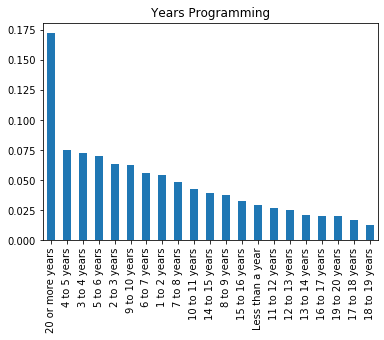

In [3]:
df_working_set = df_working_set.dropna(subset=['YearsProgram'], how='any')
(df_working_set.YearsProgram.value_counts()/df_working_set.shape[0]).plot(kind="bar");
plt.title("Years Programming");

df_working_set.YearsProgram.value_counts()

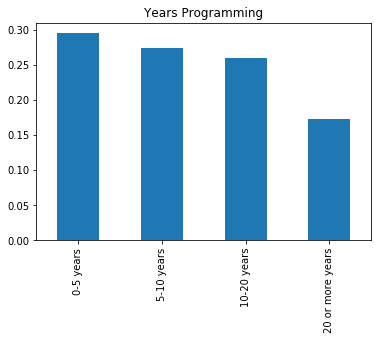

In [4]:
for row in df_working_set.index:
    if (df_working_set['YearsProgram'][row] == 'Less than a year') or (df_working_set['YearsProgram'][row] == '1 to 2 years') or (df_working_set['YearsProgram'][row] == '2 to 3 years') or (df_working_set['YearsProgram'][row] == '3 to 4 years') or (df_working_set['YearsProgram'][row] == '4 to 5 years'):          
        df_working_set.at[row, 'YearsProgram'] = '0-5 years'
    elif (df_working_set['YearsProgram'][row] == '5 to 6 years') or (df_working_set['YearsProgram'][row] == '6 to 7 years') or (df_working_set['YearsProgram'][row] == '7 to 8 years') or (df_working_set['YearsProgram'][row] == '8 to 9 years') or (df_working_set['YearsProgram'][row] == '9 to 10 years'):
        df_working_set.at[row, 'YearsProgram'] = '5-10 years'
    elif (df_working_set['YearsProgram'][row] == '10 to 11 years') or (df_working_set['YearsProgram'][row] == '11 to 12 years') or (df_working_set['YearsProgram'][row] == '12 to 13 years') or (df_working_set['YearsProgram'][row] == '13 to 14 years') or (df_working_set['YearsProgram'][row] == '14 to 15 years') or (df_working_set['YearsProgram'][row] == '15 to 16 years') or (df_working_set['YearsProgram'][row] == '16 to 17 years') or (df_working_set['YearsProgram'][row] == '17 to 18 years') or (df_working_set['YearsProgram'][row] == '18 to 19 years') or (df_working_set['YearsProgram'][row] == '19 to 20 years'):
        df_working_set.at[row, 'YearsProgram'] = '10-20 years'
        
(df_working_set.YearsProgram.value_counts()/df_working_set.shape[0]).plot(kind="bar");
plt.title("Years Programming");

# Fewer programmers, as Years Programming increases

# Analyze

In [5]:
print(df_working_set.groupby('YearsProgram').Salary.mean())
print("\n")
print('Obviously, and thankfully, Salary scales with the YearsProgram values')
print("\n")
print("\n")
print(df_working_set.groupby('YearsProgram').JobSatisfaction.mean())
print("\n")
print('Also, fairly sensibly, so does JobSatisfaction')
print('Does that mean the people who did not like it changed careers?')
print("\n")
print('Combined with the previous bar chart, we are seeing fewer programmers with higher levels of JobSatisfaction, as the years progress')

YearsProgram
0-5 years           35500.234519
10-20 years         60515.354548
20 or more years    84564.967771
5-10 years          43739.067295
Name: Salary, dtype: float64


Obviously, and thankfully, Salary scales with the YearsProgram values




YearsProgram
0-5 years           6.755184
10-20 years         7.028418
20 or more years    7.173002
5-10 years          6.873129
Name: JobSatisfaction, dtype: float64


Also, fairly sensibly, so does JobSatisfaction
Does that mean the people who did not like it changed careers?


Combined with the previous bar chart, we are seeing fewer programmers with higher levels of JobSatisfaction, as the years progress


In [6]:
df_working_set = df_working_set.drop('Salary', axis=1)

# Model

In [7]:
def print_r2_on_provided_categorical_df(df, col):
    """ Receive input from r2_of_job_satisfaction_over_years_programming 
    and split these groups according to the YearsProgram field 
    """
    
    df[col].fillna(df[col].mode()[0], inplace=True)
    
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
    
    X = df.drop('JobSatisfaction', axis=1)
    y = df['JobSatisfaction']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
    
    model_all = LinearRegression(normalize=True).fit(X_train, y_train)
    
    y_test_preds = model_all.predict(X_test)
    
    rsquared_score = r2_score(y_test, y_test_preds)

    print("This is the r2 value for all age ranges: " + str(rsquared_score) + " for the " + col + " column")

In [8]:
def r2_of_job_satisfaction_over_years_programming(df, col):
    """ Create function to do the steps above, for every category, given a dataframe
    Output the results for each category, and output them from least to greatest with their label
    Run the function for each option in YearsProgram"""
    df_all = df[['YearsProgram', 'JobSatisfaction', col]]
    df_all = df_all.dropna(subset=['JobSatisfaction'], how='any')
    df_0_5 = df_all[df_all['YearsProgram'] == '0-5 years'].drop('YearsProgram', axis=1)
    df_5_10 = df_all[df_all['YearsProgram'] == '5-10 years'].drop('YearsProgram', axis=1)
    df_10_20 = df_all[df_all['YearsProgram'] == '10-20 years'].drop('YearsProgram', axis=1)
    df_20_more = df_all[df_all['YearsProgram'] == '20 or more years'].drop('YearsProgram', axis=1)
    
    df_all = df_all.drop('YearsProgram', axis=1)
    
    
    print_r2_on_provided_categorical_df(df_all, col)
    print_r2_on_provided_categorical_df(df_0_5, col)
    print_r2_on_provided_categorical_df(df_5_10, col)
    print_r2_on_provided_categorical_df(df_10_20, col)
    print_r2_on_provided_categorical_df(df_20_more, col)

In [9]:
r2_of_job_satisfaction_over_years_programming(df_working_set, 'Professional')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'Country')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'FormalEducation')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'HomeRemote')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'CompanySize')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'CompanyType')
print("\n")
r2_of_job_satisfaction_over_years_programming(df_working_set, 'DeveloperType')
print("\n")

This is the r2 value for all age ranges: 0.005069933065174781 for the Professional column
This is the r2 value for all age ranges: 0.011136012210314683 for the Professional column
This is the r2 value for all age ranges: 0.00396017064383869 for the Professional column
This is the r2 value for all age ranges: 9.030423015143896e-06 for the Professional column
This is the r2 value for all age ranges: -0.0003308796559391425 for the Professional column


This is the r2 value for all age ranges: -1.0033810046037427e+27 for the Country column
This is the r2 value for all age ranges: -3.641217341659858e+27 for the Country column
This is the r2 value for all age ranges: -3.615563541827809e+24 for the Country column
This is the r2 value for all age ranges: -1.6205971479053444e+25 for the Country column
This is the r2 value for all age ranges: -1.5820563730171353e+26 for the Country column


This is the r2 value for all age ranges: 0.0018748418743947948 for the FormalEducation column
This is the 

In [11]:
print("Ouptput below is the sorted order of the r2 values across the different age categories")
print("Given the age ranges, these are the columns that correlate the most with JobSatisfaction")
print("\t All age ranges: HomeRemote, Professional, CompanyType, CompanySize, FormalEducation, Country, DeveloperType")
print("\t 0-5 years programming: HomeRemote, Professional, CompanyType, FormalEducation, CompanySize, Country, DeveloperType")
print("\t 5-10 years programming: HomeRemote, Professional, CompanyType, FormalEducation, CompanySize, Country, DeveloperType")
print("\t 10-20 years programming: HomeRemote, CompanyType, Professional, CompanySize, FormalEducation, Country, DeveloperType")
print("\t 20+ years programming: HomeRemote, CompanyType, FormalEducation, Professional, CompanySize, Country, DeveloperType")
print("\n")
print("Some interesting take aways!")
print("HomeRemote reigns supreme!")
print("The country you are from and the type of developer you are do not impact your JobSatisfaction")
print("Interestingly, the Professional column is a much stronger predictor in the 0-5 year range, when compared to the other age ranges")

Ouptput below is the sorted order of the r2 values across the different age categories
Given the age ranges, these are the columns that correlate the most with JobSatisfaction
	 All age ranges: HomeRemote, Professional, CompanyType, CompanySize, FormalEducation, Country, DeveloperType
	 0-5 years programming: HomeRemote, Professional, CompanyType, FormalEducation, CompanySize, Country, DeveloperType
	 5-10 years programming: HomeRemote, Professional, CompanyType, FormalEducation, CompanySize, Country, DeveloperType
	 10-20 years programming: HomeRemote, CompanyType, Professional, CompanySize, FormalEducation, Country, DeveloperType
	 20+ years programming: HomeRemote, CompanyType, FormalEducation, Professional, CompanySize, Country, DeveloperType


Some interesting take aways!
HomeRemote reigns supreme!
The country you are from and the type of developer you are do not impact your JobSatisfaction
Interestingly, the Professional column is a much stronger predictor in the 0-5 year range, 

# Visualize

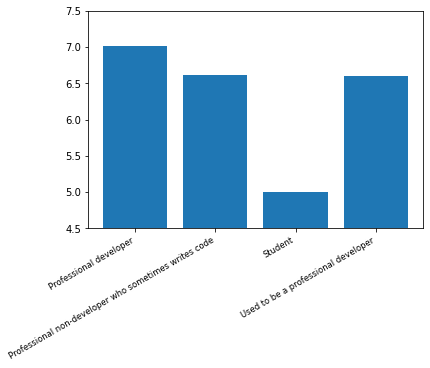

In [12]:
df_professional_satisfaction = df_working_set.groupby('Professional').mean()
df_professional_satisfaction['JobSatisfaction'].keys()
df_professional_satisfaction['JobSatisfaction'].values

fig, ax = plt.subplots()
ax.set(ylim=[4.5, 7.5])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
plt.bar(df_professional_satisfaction['JobSatisfaction'].keys(), df_professional_satisfaction['JobSatisfaction'].values)

plt.show()

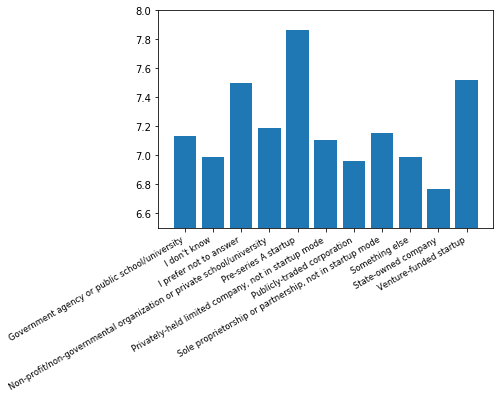

In [13]:
df_working_set_20_more_company = df_working_set[df_working_set['YearsProgram'] == '20 or more years']
df_company_satisfaction = df_working_set_20_more_company.groupby('CompanyType').mean()
df_company_satisfaction['JobSatisfaction'].keys()
df_company_satisfaction['JobSatisfaction'].values

fig, ax = plt.subplots()
ax.set(ylim=[6.5, 8])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
plt.bar(df_company_satisfaction['JobSatisfaction'].keys(), df_company_satisfaction['JobSatisfaction'].values)

plt.show()